# Finding the Best Time to Create Posts on Hacker News
---
[Hacker News](https://news.ycombinator.com/news) is a site started by the startup incubator [Y Combinator](https://www.ycombinator.com/), where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.


We're specifically interested in posts whose titles begin with either `Ask HN` or `Show HN`. 

Users submit `Ask HN` posts to ask the Hacker News community a specific question. 

Below are a couple examples:


>- Ask HN: What is that one deciding factor that makes a website successful?
- Ask HN: How do you monitor server logs
- Ask HN: What are the potential pitfalls of stock options?


Likewise, users submit `Show HN` posts to show the Hacker News community a project, product, or just generally something interesting. 

Below are a couple of examples:

>- Show HN: A simple library for complicated animations
- Show HN: Hangman-game in command line. Knowing words is fun
- Show HN: World's first kids art gallery


We'll compare these two types of posts to determine the following:


- **Do `Ask HN` or `Show HN` receive more comments on average?**
- **Do posts created at a certain time receive more comments on average?**


## About the Dataset Used in This Project
---
The [data set](https://www.kaggle.com/hacker-news/hacker-news-posts) can be downloaded from this [link](https://www.kaggle.com/hacker-news/hacker-news-posts).

This data set is Hacker News posts for 12 months (up to September 26 2016).

It includes the following columns:

- **title**: title of the post (self explanatory)

- **url**: the url of the item being linked to

- **num_points**: the number of upvotes the post received

- **num_comments**: the number of comments the post received

- **author**: the name of the account that made the post

- **created_at**: the date and time the post was made (the time zone is Eastern Time in the US)



In [1]:
import pandas as pd
import numpy as np

hn = pd.read_csv('HN_posts_year_to_Sep_26_2016.csv', parse_dates=['created_at'])

### Preview 5 sample records from the dataset.

hn.sample(5)

,id,title,url,num_points,num_comments,author,created_at
265909,10376312,"Helpcrowd, questions from potential customers ...",http://www.helpcrowd.co/,1,1,cambridge,2015-10-12 18:47:00
157553,11214655,Franz a free messaging app,http://meetfranz.com/,2,1,anu_gupta,2016-03-03 02:29:00
226375,10666951,Crazy Like a Box: Going Public Can Give Startu...,http://www.nytimes.com/2015/12/03/technology/c...,1,0,hvo,2015-12-03 00:33:00
96869,11724506,Israel's LiveU to beam Summer Olympics events ...,http://www.timesofisrael.com/israels-liveu-to-...,2,0,jonbaer,2016-05-18 18:35:00
77205,11899729,Machine Intelligence Will Let Us All Work Like...,https://hbr.org/2016/06/machine-intelligence-w...,1,0,scg,2016-06-14 04:14:00


In [2]:
### Check the dataset info... it looks good as there's no missing value in any column.

hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
id              293119 non-null int64
title           293119 non-null object
url             279256 non-null object
num_points      293119 non-null int64
num_comments    293119 non-null int64
author          293119 non-null object
created_at      293119 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 15.7+ MB


In [3]:
### Since we're only interested in records with comments, remove rows where number of comments is 0.

hn = hn[hn["num_comments"] > 0].copy()
hn.shape


(80401, 7)

## (1) `Ask HN` and `Show HN` Posts: Which One Receive More Comments on Average?

In [4]:
### This is a user-defined function to classify the type of post (i.e. 'Ask HN', 'Show HN', 'Other').

def get_type(str):
    
    if str.lower().startswith("ask hn"):
        return "Ask HN"
    elif str.lower().startswith("show hn"):
        return "Show HN"
    else:
        return "Other"
   

In [5]:
### Create a new column to indicate the type of post (i.e. 'Ask HN', 'Show HN', 'Other')

hn["type"] = hn["title"].apply(get_type)
hn.sample(5)


,id,title,url,num_points,num_comments,author,created_at,type
142193,11341553,Show HN: Nestor Hosted Hubot for Slack,https://www.asknestor.me,49,11,iamclovin,2016-03-23 01:56:00,Show HN
52577,12111508,How a Danish Town Helped Young Muslims Turn Aw...,http://www.npr.org/sections/health-shots/2016/...,88,87,tim_sw,2016-07-17 19:54:00,Other
96609,11727106,Theranos voids two years of Edison blood-test ...,http://www.wsj.com/articles/theranos-voids-two...,10,3,whbk,2016-05-19 00:26:00,Other
117869,11545623,Ask HN: Rough estimate on how long it can take...,NaN,6,5,throwawaywebdev,2016-04-21 21:58:00,Ask HN
45108,12176410,Show HN: VR demo of living the same minute ove...,https://www.youtube.com/watch?v=_eoMTN509P8,1,1,iamwil,2016-07-27 20:48:00,Show HN


In [6]:
### Since we're only interested in 'Ask HN' and 'Show HN' posts, let's remove the others.

hn_ask_show = hn[hn["type"] != "Other"].copy()


In [7]:
### The number of 'Ask HN' and 'Show HN' posts.

hn_ask_show["type"].value_counts()


Ask HN     6911
Show HN    5059
Name: type, dtype: int64

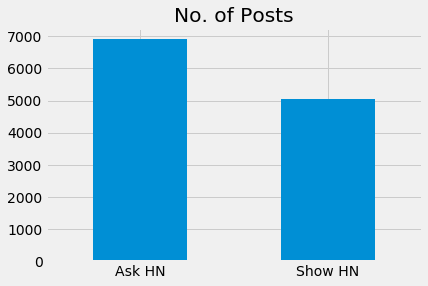

In [8]:
### Generate bar plot for the number of 'Ask HN' and 'Show HN' posts.

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

hn_ask_show["type"].value_counts().plot.bar(title="No. of Posts", rot=0)
plt.show()


In [9]:
### Getting the average number of comments by the type of post.

hn_avg_comments = hn_ask_show.groupby("type")["num_comments"].mean().sort_values(ascending=False)
hn_avg_comments


type
Ask HN     13.744176
Show HN     9.810832
Name: num_comments, dtype: float64

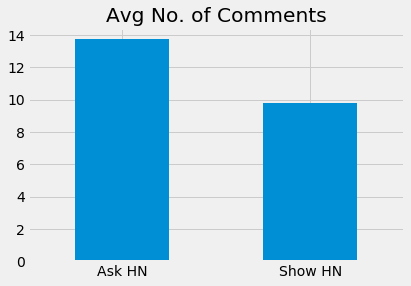

In [10]:
### Generate bar plot for the average number of comments by the type of post.

plt.style.use('fivethirtyeight')
hn_avg_comments.plot.bar(title="Avg No. of Comments", legend=False, rot=0)
plt.ylabel("")
plt.xlabel("")
plt.show()


**Observations : On average, `Ask HN` posts receive more comments than `Show HN` posts.**

- about 14 comments for `Ask HN` posts
- about 10 comments for `Show HN` posts

Next Step: Since `Ask HN` posts are more likely to receive comments, we'll focus our remaining analysis just on these posts.



## (2) Getting The Average Number of Comments for `Ask HN` Posts by Hour

- Calculate the amount of `Ask HN` posts created in each hour of the day, along with the number of comments received.
- Calculate the average number of comments `Ask HN` posts receive by hour created.

In [11]:
hn_ask = hn_ask_show[hn_ask_show["type"] == "Ask HN"].copy()

### Creating a new column to indicate the hour the 'Ask HN' post is created.

hn_ask["created_hour"] = hn_ask["created_at"].dt.hour


In [12]:
### Number of 'Ask HN' posts created in each hour of the day.

hn_ask["created_hour"].value_counts()


15    467
18    452
19    420
16    415
21    407
17    404
20    392
14    378
13    326
22    287
23    276
12    274
11    251
0     231
2     227
1     223
10    219
3     212
8     190
4     186
6     176
9     176
5     165
7     157
Name: created_hour, dtype: int64

Looks like most `Ask HN` posts are created between 3pm to 9pm (on US Eastern Time).

In [13]:
### Getting the average number of comments for 'Ask HN' posts by hour of the day.

ask_avg_comments = hn_ask.groupby("created_hour")["num_comments"].mean()
ask_avg_comments

created_hour
0      9.857143
1      9.367713
2     13.198238
3     10.160377
4     12.688172
5     11.139394
6      9.017045
7     10.095541
8     12.431579
9      8.392045
10    13.757991
11    11.143426
12    15.452555
13    22.223926
14    13.153439
15    39.668094
16    10.761446
17    13.730198
18    10.789823
19     9.414286
20    11.382653
21    11.056511
22    11.749129
23     8.322464
Name: num_comments, dtype: float64

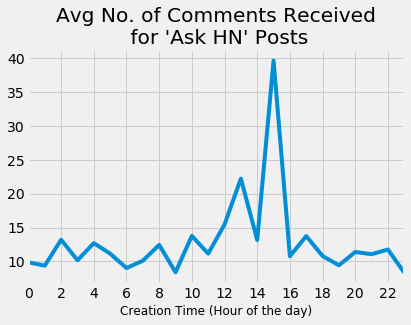

In [14]:
### Generate line plot for the average number of comments for Ask HN posts created during the specific hours.

#plt.style.use('fivethirtyeight')
ask_avg_comments.plot(title="Avg No. of Comments Received\n for 'Ask HN' Posts", legend=False, rot=0)
plt.ylabel("")
plt.xlabel("Creation Time (Hour of the day)", fontsize = 12)
plt.xticks(list(range(0,24,2)))
plt.show()


In [15]:
ask_avg_comments_top5 = hn_ask.groupby("created_hour")["num_comments"].mean().sort_values(ascending=False).head(5)
ask_avg_comments_top5

created_hour
15    39.668094
13    22.223926
12    15.452555
10    13.757991
17    13.730198
Name: num_comments, dtype: float64

**From the result and graph above, we can see that the top 5 hours of the day (on US Eastern Time) where `Ask HN` posts was created and receive the most comments are:**

- 15:00 (3pm) -> 39.67 average comments per post
- 13:00 (1pm) -> 22.22 average comments per post
- 12:00 (12pm) -> 15.45 average comments per post
- 10:00 (10am) -> 13.76 average comments per post
- 17:00 (5pm) -> 13.73 average comments per post

`Ask HN` posts created during these hours seems to receive the most comments.

### Convert the times to the local time zone

The records in this dataset are on US Eastern Time.

- US Eastern Time Zone is GMT/UTC - 5h during Standard Time.
- US Eastern Time Zone is GMT/UTC - 4h during Daylight Saving Time.
- Singapore is GMT/UTC + 8h during Standard Time.

US Eastern Time is 13 hours earlier than Singapore during Standard Time.

Example: `Tuesday 2/4/2020 1:52 AM EST` = `Tuesday 2/4/2020 2:52 PM UTC+08:00`

Therefore, to convert the time to SGT time, we need to add 13 hours.

In [16]:
import datetime as dt

### Creating a new column to indicate the hour the 'Ask HN' post is created at SGT local time.

hn_ask["created_hour_SGT"] = hn_ask["created_at"] + dt.timedelta(hours=13)
hn_ask["created_hour_SGT"] = hn_ask["created_hour_SGT"].dt.hour

### Getting the average number of comments for 'Ask HN' posts by hour, on SGT local time.

hn_ask.groupby("created_hour_SGT")["num_comments"].mean().sort_values(ascending=False).head(5)


created_hour_SGT
4     39.668094
2     22.223926
1     15.452555
23    13.757991
6     13.730198
Name: num_comments, dtype: float64

**After conversion, we can see that the top 5 hours of the day (on SGT Local Time) where `Ask HN` posts was created and receive the most comments are:**

- 04:00 (4am) -> 39.67 average comments per post
- 02:00 (2am) -> 22.22 average comments per post
- 01:00 (1am) -> 15.45 average comments per post
- 23:00 (11pm) -> 13.76 average comments per post
- 06:00 (6am) -> 13.73 average comments per post

`Ask HN` posts created during these hours seems to receive the most comments.

## (3) Conclusion

Which hours should you create a post during the day to have a higher chance of receiving comments?

Well, a post created during the following time would have a higher chance of receiving comments:

- Between 10am to 5pm on US Eastern Time (the peak is at 3pm).
- Between 11pm to 6am on SGT local time (the peak is at 4am).